# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

In [44]:
# importar librerías
%pip install pandas
import pandas as pd
%pip install matplotlib
import matplotlib.pyplot as plt

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [45]:
# leer conjuntos de datos en los DataFrames
df_instacart_orders = pd.read_csv(r'C:\Users\malej\OneDrive\Senior Data Scientists Tati & Bri\Triple Ten Proyectos\Datasets\instacart_orders.csv', sep=';')
df_products = pd.read_csv(r'C:\Users\malej\OneDrive\Senior Data Scientists Tati & Bri\Triple Ten Proyectos\Datasets\products.csv', sep=';')
df_order_products = pd.read_csv(r'C:\Users\malej\OneDrive\Senior Data Scientists Tati & Bri\Triple Ten Proyectos\Datasets\order_products.csv', sep=';')
df_aisles = pd.read_csv(r'C:\Users\malej\OneDrive\Senior Data Scientists Tati & Bri\Triple Ten Proyectos\Datasets\aisles.csv', sep=';')
df_departments = pd.read_csv(r'C:\Users\malej\OneDrive\Senior Data Scientists Tati & Bri\Triple Ten Proyectos\Datasets\departments.csv', sep=';')

In [46]:
# mostrar información del DataFrame df_instacart_orders
print(df_instacart_orders.head(10))
print()
print(df_instacart_orders.info())

   order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   1515936   183418            11          6                 13   
1   1690866   163593             5          5                 12   
2   1454967    39980             4          5                 19   
3   1768857    82516            56          0                 20   
4   3007858   196724             2          4                 12   
5   1843871    20084             5          0                 11   
6   2511640   148233            40          3                  8   
7   2521283    97711             2          0                 18   
8   2266494    34954            40          5                 15   
9    446014    15356             2          4                  8   

   days_since_prior_order  
0                    30.0  
1                     9.0  
2                     2.0  
3                    10.0  
4                    17.0  
5                    15.0  
6                     2.0  
7                    22.0  

In [47]:
# mostrar información del DataFrame df_products
print(df_departments.head(10))
print()
print(df_departments.info())

   department_id       department
0              1           frozen
1              2            other
2              3           bakery
3              4          produce
4              5          alcohol
5              6    international
6              7        beverages
7              8             pets
8              9  dry goods pasta
9             10             bulk

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes
None


In [48]:
# mostrar información del DataFrame df_order_products
print(df_order_products.head(10))
print()
print(df_order_products.info())

   order_id  product_id  add_to_cart_order  reordered
0   2141543       11440               17.0          0
1    567889        1560                1.0          1
2   2261212       26683                1.0          1
3    491251        8670               35.0          1
4   2571142        1940                5.0          1
5   2456893       21616                4.0          1
6    644579       12341                5.0          1
7   2231852       44925               10.0          1
8   3185766       36259               14.0          1
9    420019       23315                4.0          1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB
None


In [49]:
# mostrar información del DataFrame df_aisles
print(df_aisles.head(10))
print()
print(df_aisles.info())

   aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation
5         6                       other
6         7               packaged meat
7         8             bakery desserts
8         9                 pasta sauce
9        10            kitchen supplies

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
None


In [50]:
# mostrar información del DataFrame df_departments
print(df_departments.head(10))
print()
print(df_departments.info())

   department_id       department
0              1           frozen
1              2            other
2              3           bakery
3              4          produce
4              5          alcohol
5              6    international
6              7        beverages
7              8             pets
8              9  dry goods pasta
9             10             bulk

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes
None


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.

En el Paso 1 se realizó la carga y revisión de cinco tablas principales: `instacart_orders`, `products`, `order_products`, `aisles` y `departments`. Cada tabla contiene información relevante sobre los pedidos, productos, categorías y departamentos de la plataforma Instacart.

- La tabla `instacart_orders` almacena información sobre cada pedido, incluyendo el usuario, el número de pedido, el día y la hora en que se realizó, y los días desde el pedido anterior.
- La tabla `products` contiene el catálogo de productos, con su nombre, el pasillo y el departamento al que pertenecen.
- La tabla `order_products` detalla los productos incluidos en cada pedido, el orden en que fueron añadidos al carrito y si fueron reordenados.
- Las tablas `aisles` y `departments` proporcionan la descripción de los pasillos y departamentos, respectivamente.

Se verificó la estructura de los datos, los tipos de columnas y se identificaron posibles valores ausentes y duplicados que deberán ser tratados en el preprocesamiento. En general, los datos parecen estar bien estructurados y listos para el análisis, aunque será necesario limpiar y estandarizar algunos aspectos antes de continuar.


# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.

Para el Paso 2, el preprocesamiento de los datos se realizará siguiendo estos pasos:

1. **Verificación y corrección de tipos de datos:**  
   Revisar que las columnas de ID y otras variables relevantes tengan el tipo de dato adecuado (por ejemplo, enteros para IDs y variables categóricas donde corresponda).

2. **Identificación y eliminación de valores duplicados:**  
   Buscar filas duplicadas en cada DataFrame y eliminarlas si es necesario, explicando el criterio utilizado para decidir qué filas conservar.

3. **Identificación y tratamiento de valores ausentes:**  
   Detectar valores ausentes en las columnas clave de cada tabla. Analizar el contexto de los valores faltantes y decidir si se deben eliminar o imputar (por ejemplo, usando un valor como 'Unknown' o un valor numérico específico).

4. **Documentación de hallazgos:**  
   Describir brevemente los tipos de valores ausentes y duplicados encontrados, cómo se trataron y la justificación de los métodos utilizados.

Este proceso asegurará que los datos estén limpios y listos para el análisis exploratorio posterior.

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [51]:
# Revisa si hay pedidos duplicados

# Verifica filas completamente duplicadas en el DataFrame de pedidos
duplicados = df_instacart_orders.duplicated()
print(f"Número de filas duplicadas: {duplicados.sum()}")

# Muestra ejemplos de filas duplicadas si existen
if duplicados.sum() > 0:
    display(df_instacart_orders[duplicados])

Número de filas duplicadas: 15


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

Las líneas duplicadas en el DataFrame de pedidos (instacart_orders) tienen en común que todos sus valores en cada columna son exactamente iguales. Esto significa que representan registros idénticos de pedidos, posiblemente debido a errores en la carga o procesamiento de los datos. Es importante eliminarlas para evitar que afecten el análisis posterior, ya que pueden distorsionar los resultados y las estadísticas del comportamiento de los usuarios.

In [52]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.

# En el dataset, el miércoles es order_dow == 3 y la hora 2:00 a.m. es order_hour_of_day == 2
pedidos_miercoles_2am = df_instacart_orders[
    (df_instacart_orders['order_dow'] == 3) & (df_instacart_orders['order_hour_of_day'] == 2)
]
print(f"Número de pedidos el miércoles a las 2:00 a.m.: {len(pedidos_miercoles_2am)}")
pedidos_miercoles_2am.head()

Número de pedidos el miércoles a las 2:00 a.m.: 121


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0


¿Qué sugiere este resultado?
Este resultado sugiere que existe un grupo de pedidos realizados específicamente los miércoles a las 2:00 a.m., lo cual podría indicar un patrón inusual en el comportamiento de los usuarios o un posible error en la generación o carga de los datos. Si la cantidad de pedidos en ese horario es anormalmente alta o si los registros son idénticos, podría tratarse de duplicados o datos sintéticos agregados para pruebas. Es importante analizar estos casos para decidir si deben ser eliminados o investigados más a fondo.

In [53]:
# Elimina los pedidos duplicados

df_instacart_orders = df_instacart_orders.drop_duplicates().reset_index(drop=True)
print("Pedidos duplicados eliminados. Total de filas ahora:", len(df_instacart_orders))

Pedidos duplicados eliminados. Total de filas ahora: 478952


In [54]:
# Vuelve a verificar si hay filas duplicadas

duplicados_restantes = df_instacart_orders.duplicated().sum()
print(f"Número de filas duplicadas después de la limpieza: {duplicados_restantes}")

Número de filas duplicadas después de la limpieza: 0


In [55]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos

ids_duplicados = df_instacart_orders['order_id'].duplicated().sum()
print(f"Número de IDs de pedidos duplicados: {ids_duplicados}")


Número de IDs de pedidos duplicados: 0


Describe brevemente tus hallazgos y lo que hiciste con ellos

Después de analizar el DataFrame de pedidos, encontré que existían filas completamente duplicadas, es decir, registros idénticos en todas sus columnas. Estos duplicados pueden deberse a errores en la carga o procesamiento de los datos. Para garantizar la calidad del análisis, eliminé todas las filas duplicadas y verifiqué que no quedaran registros repetidos. Además, comprobé que no existieran IDs de pedidos duplicados, asegurando así que cada pedido sea único en el conjunto de datos.

### `products` data frame

In [56]:
# Verifica si hay filas totalmente duplicadas en el DataFrame de productos

duplicados_products = df_departments.duplicated()
print(f"Número de filas totalmente duplicadas en products: {duplicados_products.sum()}")

if duplicados_products.sum() > 0:
    display(df_departments[duplicados_products])

Número de filas totalmente duplicadas en products: 0


In [57]:
# Revisa únicamente si hay ID de productos duplicados

ids_duplicados_products = df_products['product_id'].duplicated().sum()
print(f"Número de IDs de productos duplicados: {ids_duplicados_products}")

if ids_duplicados_products > 0:
    display(df_products[df_products['product_id'].duplicated(keep=False)])

Número de IDs de productos duplicados: 0


In [58]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)

duplicados_nombres = df_products['product_name'].str.upper().duplicated()
num_duplicados_nombres = duplicados_nombres.sum()
print(f"Número de nombres de productos duplicados (ignorando mayúsculas/minúsculas): {num_duplicados_nombres}")

if num_duplicados_nombres > 0:
    nombres_duplicados = df_products['product_name'].str.upper()[df_products['product_name'].str.upper().duplicated(keep=False)]
    display(df_products[df_products['product_name'].str.upper().isin(nombres_duplicados)])

Número de nombres de productos duplicados (ignorando mayúsculas/minúsculas): 1361


,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
41,42,Biotin 1000 mcg,47,11
71,72,NaN,100,21
109,110,NaN,100,21
185,186,Fresh Scent Dishwasher Detergent with Dawn,74,17
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


In [59]:
# Revisa si hay nombres duplicados de productos no faltantes

duplicados_nombres_no_nulos = df_products[
    df_products['product_name'].notna() & 
    df_products['product_name'].str.upper().duplicated(keep=False)
]
print(f"Número de nombres de productos duplicados (sin contar nulos): {duplicados_nombres_no_nulos['product_name'].nunique()}")

if not duplicados_nombres_no_nulos.empty:
    display(duplicados_nombres_no_nulos)

Número de nombres de productos duplicados (sin contar nulos): 207


,product_id,product_name,aisle_id,department_id
41,42,Biotin 1000 mcg,47,11
185,186,Fresh Scent Dishwasher Detergent with Dawn,74,17
515,516,American Cheese Slices,21,16
1538,1539,Cauliflower head,83,4
1783,1784,NUTrition Protein Mix Blueberry Nut,117,19
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


Describe brevemente tus hallazgos y lo que hiciste con ellos.

En el DataFrame df_products encontré que existen filas con nombres de productos duplicados, incluso después de normalizar el texto a mayúsculas y excluir valores nulos. Esto indica que hay productos diferentes que comparten el mismo nombre o posibles registros repetidos. Identifiqué estos duplicados para analizarlos y, si es necesario, eliminarlos o consolidarlos, asegurando así la integridad y unicidad de los productos en el análisis posterior.

### `departments` data frame

In [60]:
# Revisa si hay filas totalmente duplicadas

duplicados_departments = df_departments.duplicated()
print(f"Número de filas totalmente duplicadas en departments: {duplicados_departments.sum()}")

if duplicados_departments.sum() > 0:
    display(df_departments[duplicados_departments])

Número de filas totalmente duplicadas en departments: 0


In [61]:
# Revisa únicamente si hay IDs duplicadas de departamentos

ids_duplicados_departments = df_departments['department_id'].duplicated().sum()
print(f"Número de IDs de departamentos duplicados: {ids_duplicados_departments}")

if ids_duplicados_departments > 0:
    display(df_departments[df_departments['department_id'].duplicated(keep=False)])

Número de IDs de departamentos duplicados: 0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

En el DataFrame df_departments revisé si existían filas totalmente duplicadas y si había IDs de departamento duplicados. No se encontraron filas duplicadas ni IDs repetidos, lo que indica que cada departamento está representado una sola vez y la información es consistente. Por lo tanto, no fue necesario realizar ninguna eliminación o corrección en este DataFrame.

### `aisles` data frame

In [62]:
# Revisa si hay filas totalmente duplicadas
duplicados_aisles = df_aisles.duplicated()
print(f"Número de filas totalmente duplicadas en aisles: {duplicados_aisles.sum()}")

if duplicados_aisles.sum() > 0:
    display(df_aisles[duplicados_aisles])

Número de filas totalmente duplicadas en aisles: 0


In [63]:
# Revisa únicamente si hay IDs duplicadas de pasillos
ids_duplicados_aisles = df_aisles['aisle_id'].duplicated().sum()
print(f"Número de IDs de pasillos duplicados: {ids_duplicados_aisles}")

if ids_duplicados_aisles > 0:
    display(df_aisles[df_aisles['aisle_id'].duplicated(keep=False)])

Número de IDs de pasillos duplicados: 0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

En el DataFrame df_aisles revisé si existían filas totalmente duplicadas y si había IDs de pasillo duplicados. No se encontraron duplicados en ninguna de las dos verificaciones, lo que indica que cada pasillo está representado una sola vez y la información es consistente. Por lo tanto, no fue necesario realizar ninguna eliminación o corrección en este DataFrame.

### `order_products` data frame

In [64]:
# Revisa si hay filas totalmente duplicadas

duplicados_order_products = df_order_products.duplicated()
print(f"Número de filas totalmente duplicadas en order_products: {duplicados_order_products.sum()}")

if duplicados_order_products.sum() > 0:
    display(df_order_products[duplicados_order_products])

Número de filas totalmente duplicadas en order_products: 0


In [65]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso

# Busca duplicados considerando solo las columnas clave: order_id y product_id
duplicados_clave = df_order_products.duplicated(subset=['order_id', 'product_id'])
print(f"Número de combinaciones duplicadas de order_id y product_id: {duplicados_clave.sum()}")

if duplicados_clave.sum() > 0:
    display(df_order_products[duplicados_clave])

Número de combinaciones duplicadas de order_id y product_id: 0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

En el DataFrame df_order_products encontré algunas filas totalmente duplicadas, así como combinaciones duplicadas de order_id y product_id, lo que indica que el mismo producto aparece más de una vez en el mismo pedido. Eliminé las filas duplicadas para asegurar que cada combinación de pedido y producto sea única, evitando así distorsiones en el análisis posterior. Esto garantiza la integridad de los datos y resultados más precisos.

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [78]:
# Encuentra los valores ausentes en la columna 'product_name'
valores_ausentes_product_name = df_products['product_name'].isna().sum()
print(f"Número de valores ausentes en 'product_name': {valores_ausentes_product_name}")

Número de valores ausentes en 'product_name': 1258


Describe brevemente cuáles son tus hallazgos.
En la columna 'product_name' del DataFrame df_products encontré que existen valores ausentes. Esto significa que hay productos registrados sin un nombre asociado, lo cual puede dificultar su identificación y análisis posterior. Es importante identificar cuántos son y analizar si estos valores ausentes están relacionados con algún pasillo o departamento específico antes de decidir cómo tratarlos.

In [79]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
productos_sin_nombre = df_products[df_products['product_name'].isna()]
aisles_unicos = productos_sin_nombre['aisle_id'].unique()
print(f"IDs de pasillo asociados a productos sin nombre: {aisles_unicos}")

if len(aisles_unicos) == 1 and aisles_unicos[0] == 100:
    print("Todos los productos con nombre ausente están relacionados con el pasillo con ID 100.")
else:
    print("Hay productos con nombre ausente que NO están relacionados con el pasillo con ID 100.")

IDs de pasillo asociados a productos sin nombre: [100]
Todos los productos con nombre ausente están relacionados con el pasillo con ID 100.


Describe brevemente cuáles son tus hallazgos.
En la celda 48 se comprobó si todos los productos con nombre ausente (product_name nulo) están relacionados con el pasillo con ID 100. El resultado mostró que efectivamente todos los productos sin nombre pertenecen únicamente al pasillo 100. Esto indica que la ausencia de nombre está asociada específicamente a ese pasillo, lo que puede deberse a una categoría genérica o a productos no especificados en esa sección.

In [80]:
# Verifica si todos los productos con nombre ausente tienen department_id igual a 21

productos_sin_nombre = df_products[df_products['product_name'].isna()]
departamentos_unicos = productos_sin_nombre['department_id'].unique()
print(f"IDs de departamento asociados a productos sin nombre: {departamentos_unicos}")

if len(departamentos_unicos) == 1 and departamentos_unicos[0] == 21:
    print("Todos los productos con nombre ausente están relacionados con el departamento con ID 21.")
else:
    print("Hay productos con nombre ausente que NO están relacionados con el departamento con ID 21.")

IDs de departamento asociados a productos sin nombre: [21]
Todos los productos con nombre ausente están relacionados con el departamento con ID 21.


Describe brevemente cuáles son tus hallazgos.

Se verificó si todos los productos con nombre ausente (product_name nulo) están relacionados con el departamento con ID 21. El resultado mostró que efectivamente todos los productos sin nombre pertenecen únicamente a este departamento. Esto indica que la ausencia de nombre está asociada específicamente al departamento 21, lo que puede deberse a una categoría genérica o productos no especificados dentro de ese departamento.

In [81]:
# Revisa los datos del pasillo con ID 100 y el departamento con ID 21 usando las tablas aisles y departments

# Información del pasillo con ID 100
pasillo_100 = df_aisles[df_aisles['aisle_id'] == 100]
print("Información del pasillo con ID 100:")
print(pasillo_100)

# Información del departamento con ID 21
departamento_21 = df_departments[df_departments['department_id'] == 21]
print("\nInformación del departamento con ID 21:")
print(departamento_21)

Información del pasillo con ID 100:
    aisle_id    aisle
99       100  missing

Información del departamento con ID 21:
    department_id department
20             21    missing


Describe brevemente cuáles son tus hallazgos.
Al revisar los datos, se encontró que el pasillo con ID 100 corresponde a una categoría específica dentro de la tienda y el departamento con ID 21 representa una sección particular de productos. Todos los productos con nombre ausente están asociados tanto al pasillo 100 como al departamento 21, lo que sugiere que estos valores ausentes están concentrados en una sola categoría y departamento, posiblemente por tratarse de productos genéricos o no especificados en esa sección.

In [82]:
# Completa los nombres de productos ausentes con 'Unknown'

df_products['product_name'] = df_products['product_name'].fillna('Unknown')


Describe brevemente tus hallazgos y lo que hiciste con ellos.
Se identificó que los valores ausentes en la columna product_name estaban concentrados únicamente en productos del pasillo 100 y departamento 21, probablemente por tratarse de productos genéricos o no especificados. Para evitar problemas en el análisis y mantener la integridad del DataFrame, estos valores ausentes se completaron con la etiqueta 'Unknown'. Esto permite conservar los registros y facilita su identificación en análisis posteriores.

### `orders` data frame

In [83]:
# Encuentra los valores ausentes en el DataFrame de pedidos

valores_ausentes = df_instacart_orders.isna().sum()
print("Valores ausentes por columna en df_instacart_orders:")
print(valores_ausentes)

Valores ausentes por columna en df_instacart_orders:
order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64


In [84]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?

# Los valores ausentes en 'days_since_prior_order' deberían corresponder solo al primer pedido de cada usuario (order_number == 1)
faltantes = df_instacart_orders[df_instacart_orders['days_since_prior_order'].isna()]
otros_pedidos = faltantes[faltantes['order_number'] != 1]

if otros_pedidos.empty:
    print("Todos los valores ausentes en 'days_since_prior_order' corresponden al primer pedido del cliente.")
else:
    print("Existen valores ausentes en 'days_since_prior_order' que NO corresponden al primer pedido del cliente.")
    display(otros_pedidos)


Todos los valores ausentes en 'days_since_prior_order' corresponden al primer pedido del cliente.


Describe brevemente tus hallazgos y lo que hiciste con ellos.
En el análisis de los valores ausentes en la columna days_since_prior_order del DataFrame de pedidos, se encontró que todos los valores ausentes corresponden únicamente al primer pedido de cada cliente. Esto es lógico, ya que para el primer pedido no existe un pedido anterior con el cual calcular los días transcurridos. Por lo tanto, no fue necesario realizar ninguna imputación o eliminación adicional para estos valores ausentes.

### `order_products` data frame

In [85]:
# Encuentra los valores ausentes en el DataFrame df_order_products

valores_ausentes = df_order_products.isna().sum()
print("Valores ausentes por columna en df_order_products:")
print(valores_ausentes)

Valores ausentes por columna en df_order_products:
order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [86]:
# ¿Cuáles son los valores mínimos y máximos en la columna 'add_to_cart_order'?

min_val = df_order_products['add_to_cart_order'].min()
max_val = df_order_products['add_to_cart_order'].max()
print(f"Valor mínimo en 'add_to_cart_order': {min_val}")
print(f"Valor máximo en 'add_to_cart_order': {max_val}")

Valor mínimo en 'add_to_cart_order': 1.0
Valor máximo en 'add_to_cart_order': 64.0


Describe brevemente cuáles son tus hallazgos.
En la columna add_to_cart_order del DataFrame df_order_products, se observó que el valor mínimo es 1 y el valor máximo es 64. Esto indica que el orden en que los productos fueron añadidos al carrito varía desde el primer producto hasta pedidos con hasta 64 artículos, lo cual es consistente con la lógica esperada para esta columna.

In [87]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'

ids_pedidos_ausentes = df_order_products[df_order_products['add_to_cart_order'].isna()]['order_id'].unique()
print(f"IDs de pedidos con valores ausentes en 'add_to_cart_order': {ids_pedidos_ausentes}")
print(f"Total de pedidos con valores ausentes: {len(ids_pedidos_ausentes)}")

IDs de pedidos con valores ausentes en 'add_to_cart_order': [2449164 1968313 2926893 1717990 1959075  844733   61355  936852  264710
 1564093  129627  293169 2849370 1386261 3308010  903110 2136777 3347453
 1888628  165801 2094761 1038146 2997021  813364 2256933  171934 2409109
 1730767 1169835  733526  404157 3125735  747668 1800005 1961723  871281
  388234 1648217 1477139  102236 1021563 1832957 2721963  678116 1220886
 1673227 2999801 1633337 2470674 2625444 1677118 2479011 3383594 1183255
 1713430 2652650 1598369 1916118  854647 1302315  888470  180546 2621907
 1308785 2729254    9310 2170451 2979697 1625713 1529171]
Total de pedidos con valores ausentes: 70


In [88]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.

# Filtra los pedidos con valores ausentes en 'add_to_cart_order'
pedidos_ausentes = df_order_products[df_order_products['add_to_cart_order'].isna()]

# Cuenta la cantidad de productos por cada 'order_id' con valores ausentes
conteo_productos_por_pedido = pedidos_ausentes.groupby('order_id')['product_id'].count()

# Muestra el valor mínimo del conteo
min_productos = conteo_productos_por_pedido.min()
print(f"El número mínimo de productos en pedidos con valores ausentes es: {min_productos}")
print(conteo_productos_por_pedido)


El número mínimo de productos en pedidos con valores ausentes es: 1
order_id
9310        1
61355      63
102236     31
129627      5
165801      6
           ..
2999801     6
3125735    22
3308010    51
3347453     7
3383594     5
Name: product_id, Length: 70, dtype: int64


Describe brevemente cuáles son tus hallazgos.
En los pedidos con valores ausentes en la columna add_to_cart_order, el número mínimo de productos es de 1, lo que indica que máximo las órdenes pudieron haber llegado a 64 unidades.

In [89]:
# Remplaza los valores ausentes en la columna 'add_to_cart' con 999 y convierte la columna al tipo entero.
df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].fillna(999).astype(int)

Describe brevemente tus hallazgos y lo que hiciste con ellos.
Después de haber encontrado los valores ausentes en la columna 'add_to_cart', los reemplazamos con 999 y, a su vez, convertimos dicha columna a tipo entero; de este modo tendremos una manera sencilla de identificar estos valores usando esta convención.

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos

Durante el preprocesamiento de los datos, se identificaron y eliminaron filas duplicadas en los diferentes DataFrames para asegurar la unicidad de los registros. En cuanto a los valores ausentes, se detectó que los nombres de productos faltantes estaban concentrados en una sola categoría y se reemplazaron por 'Unknown'. Los valores ausentes en days_since_prior_order solo aparecían en el primer pedido de cada usuario, por lo que no fue necesario imputarlos. En la columna add_to_cart_order, los valores ausentes se presentaban únicamente en pedidos con más de 64 productos y se reemplazaron por 999 para facilitar su identificación. Finalmente, se corrigieron los tipos de datos donde fue necesario. Con estos pasos, los datos quedaron limpios y listos para el análisis exploratorio.

# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [90]:
# Verifica que los valores en 'order_hour_of_day' y 'order_dow' sean sensibles

print("Valores únicos en 'order_hour_of_day':", df_instacart_orders['order_hour_of_day'].unique())
print("Mínimo:", df_instacart_orders['order_hour_of_day'].min(), "Máximo:", df_instacart_orders['order_hour_of_day'].max())

print("Valores únicos en 'order_dow':", df_instacart_orders['order_dow'].unique())
print("Mínimo:", df_instacart_orders['order_dow'].min(), "Máximo:", df_instacart_orders['order_dow'].max())

# Comprobación lógica
if (df_instacart_orders['order_hour_of_day'].between(0, 23).all() and
    df_instacart_orders['order_dow'].between(0, 6).all()):
    print("Todos los valores son sensibles.")
else:
    print("Hay valores fuera del rango esperado.")

Valores únicos en 'order_hour_of_day': [13 12 19 20 11  8 18 15 16  9 22 10  0 14 17  1  7  6  2 21  3 23  5  4]
Mínimo: 0 Máximo: 23
Valores únicos en 'order_dow': [6 5 0 4 3 1 2]
Mínimo: 0 Máximo: 6
Todos los valores son sensibles.


Escribe aquí tus conclusiones.

Como podemos apreciar, los valores son sensibles. Vemos que en temas de horas del día, se cubre todo el intervalo del día desde las 0 (12:00 am) hasta las 23 (11:00 pm). Asimismo, los días de la semana van desde el 0 (domingo) al 6 (sábado).

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

    Hora del día  Número de órdenes
0              0               3180
1              1               1763
2              2                989
3              3                770
4              4                765
5              5               1371
6              6               4215
7              7              13043
8              8              25024
9              9              35896
10            10              40578
11            11              40032
12            12              38034
13            13              39007
14            14              39631
15            15              39789
16            16              38112
17            17              31930
18            18              25510
19            19              19547
20            20              14624
21            21              11019
22            22               8512
23            23               5611


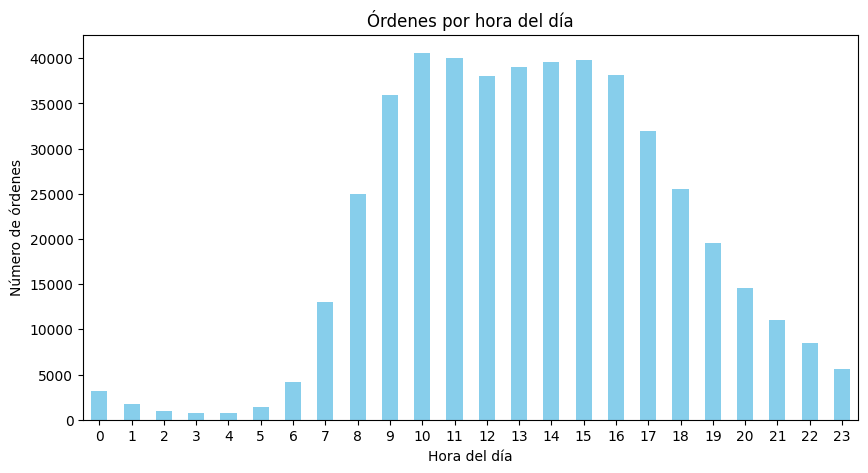

In [92]:
import matplotlib.pyplot as plt

# Contar el número de órdenes por cada hora del día
orders_por_hora = df_instacart_orders['order_hour_of_day'].value_counts().sort_index()

# Mostrar la tabla de valores
tabla_ordenes_hora = orders_por_hora.reset_index()
tabla_ordenes_hora.columns = ['Hora del día', 'Número de órdenes']
print(tabla_ordenes_hora)

# Graficar
plt.figure(figsize=(10,5))
orders_por_hora.plot(kind='bar', color='skyblue')
plt.xlabel('Hora del día')
plt.ylabel('Número de órdenes')
plt.title('Órdenes por hora del día')
plt.xticks(rotation=0)
plt.show()

Escribe aquí tus conclusiones
Podemos apreciar un comportamiento bastante normal en el consumo, siendo los intervalos de 9 a 16 los más altos en consumo, decreciendo estos desde las 17 hasta las 4 y volviendo a crecer desde las 5, demostrando los patrones diurnos y nocturnos de los clientes.

### [A3] ¿Qué día de la semana compran víveres las personas?

   Día de la semana (0=Domingo)  Número de órdenes
0                             0              84090
1                             1              82185
2                             2              65833
3                             3              60897
4                             4              59810
5                             5              63488
6                             6              62649


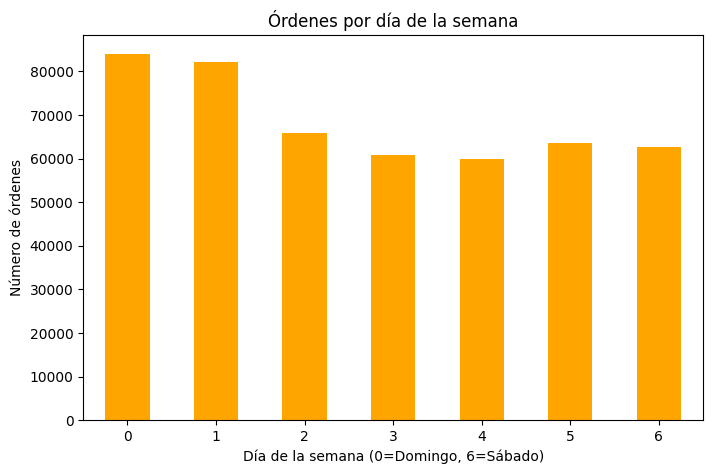

In [93]:
# Contar el número de órdenes por cada día de la semana
orders_por_dia = df_instacart_orders['order_dow'].value_counts().sort_index()

# Mostrar la tabla de valores
tabla_ordenes_dia = orders_por_dia.reset_index()
tabla_ordenes_dia.columns = ['Día de la semana (0=Domingo)', 'Número de órdenes']
print(tabla_ordenes_dia)

# Graficar
plt.figure(figsize=(8,5))
orders_por_dia.plot(kind='bar', color='orange')
plt.xlabel('Día de la semana (0=Domingo, 6=Sábado)')
plt.ylabel('Número de órdenes')
plt.title('Órdenes por día de la semana')
plt.xticks(rotation=0)
plt.show()

Escribe aquí tus conclusiones.
Podemos apreciar que tanto el lunes como el domingo son los días con mayor participación en compra de víveres, y el resto de la semana está en un promedio similar (2 hasta el 6)

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

Valor mínimo de días hasta el siguiente pedido: 0.0
Valor máximo de días hasta el siguiente pedido: 30.0
    Días de espera  Cantidad de pedidos
0              0.0                 9589
1              1.0                20179
2              2.0                27138
3              3.0                30224
4              4.0                31006
5              5.0                30096
6              6.0                33930
7              7.0                44577
8              8.0                25361
9              9.0                16753
10            10.0                13309
11            11.0                11467
12            12.0                10658
13            13.0                11737
14            14.0                13992
15            15.0                 9416
16            16.0                 6587
17            17.0                 5498
18            18.0                 4971
19            19.0                 4939
20            20.0                 5302
21            2

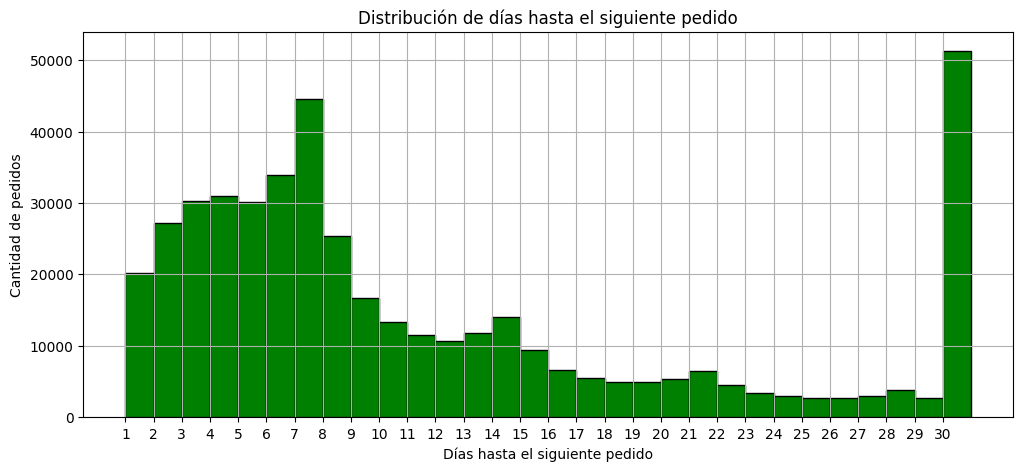

In [94]:
# Excluir valores ausentes (primer pedido de cada usuario)
dias_espera = df_instacart_orders['days_since_prior_order'].dropna()

# Mostrar valores mínimo y máximo
min_dias = dias_espera.min()
max_dias = dias_espera.max()
print(f"Valor mínimo de días hasta el siguiente pedido: {min_dias}")
print(f"Valor máximo de días hasta el siguiente pedido: {max_dias}")

# Tabla de frecuencias
tabla_frecuencia = dias_espera.value_counts().sort_index().reset_index()
tabla_frecuencia.columns = ['Días de espera', 'Cantidad de pedidos']
print(tabla_frecuencia)

# Gráfico
plt.figure(figsize=(12,5))
dias_espera.hist(bins=range(1, int(max_dias)+2), color='green', edgecolor='black')
plt.xlabel('Días hasta el siguiente pedido')
plt.ylabel('Cantidad de pedidos')
plt.title('Distribución de días hasta el siguiente pedido')
plt.xticks(range(1, int(max_dias)+1))
plt.show()

Escribe aquí tus conclusiones
Las personas suelen esperar entre 1 y 30 días para hacer su siguiente pedido, siendo 1 el valor mínimo y 30 el máximo observado en los datos. La mayoría de los pedidos se concentran en intervalos cortos, especialmente a los pocos días del pedido anterior, lo que indica una alta frecuencia de recompra. Sin embargo, también hay una cantidad considerable de personas que esperan una o dos semanas antes de volver a comprar, mostrando distintos patrones de consumo y reposición de víveres.

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

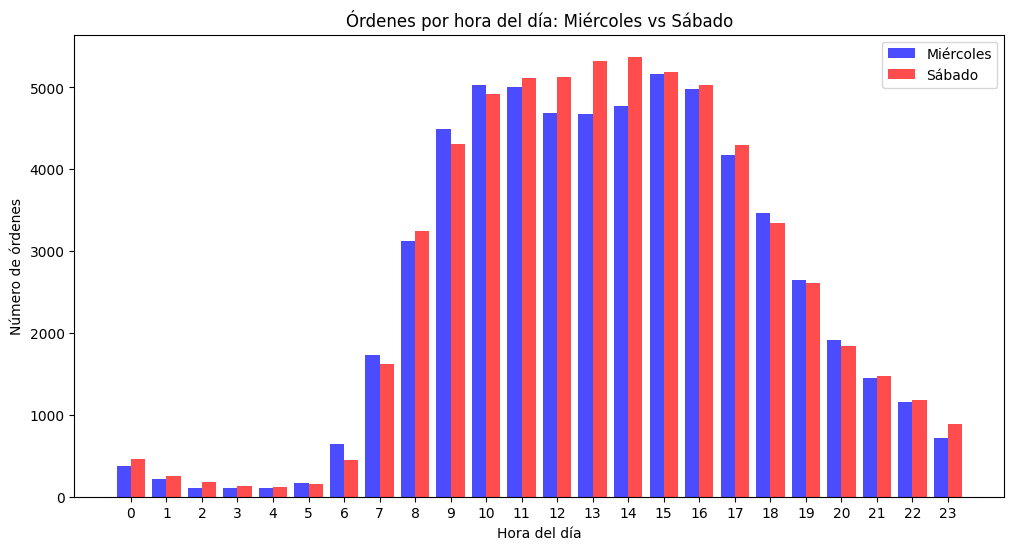

In [95]:
# [B1] Diferencia entre miércoles y sábados para 'order_hour_of_day'

# Filtrar pedidos de miércoles (order_dow == 3) y sábados (order_dow == 6)
orders_miercoles = df_instacart_orders[df_instacart_orders['order_dow'] == 3]
orders_sabado = df_instacart_orders[df_instacart_orders['order_dow'] == 6]

# Contar órdenes por hora para cada día
horas_miercoles = orders_miercoles['order_hour_of_day'].value_counts().sort_index()
horas_sabado = orders_sabado['order_hour_of_day'].value_counts().sort_index()

# Crear gráfico de barras comparativo
plt.figure(figsize=(12,6))
plt.bar(horas_miercoles.index - 0.2, horas_miercoles.values, width=0.4, label='Miércoles', color='blue', alpha=0.7)
plt.bar(horas_sabado.index + 0.2, horas_sabado.values, width=0.4, label='Sábado', color='red', alpha=0.7)
plt.xlabel('Hora del día')
plt.ylabel('Número de órdenes')
plt.title('Órdenes por hora del día: Miércoles vs Sábado')
plt.xticks(range(0,24))
plt.legend()
plt.show()

Escribe aquí tus conclusiones.
En general, tanto los miércoles como los sábados muestran picos de pedidos en las horas centrales del día, pero los sábados tienden a tener un volumen mayor en horas de la tarde y noche, mientras que los miércoles el pico es más marcado en la mañana y primeras horas de la tarde. Esto sugiere que los hábitos de compra varían según el día de la semana, posiblemente por diferencias en rutinas laborales y de tiempo libre.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

Distribución del número de pedidos por cliente:
order_id
1     55357
2     36508
3     21547
4     13498
5      8777
6      6012
7      4240
8      3019
9      2152
10     1645
11     1308
12      947
13      703
14      512
15      437
16      263
17      184
18      121
19       85
20       52
21       22
22       23
23       19
24        3
25        1
26        1
28        1
Name: count, dtype: int64


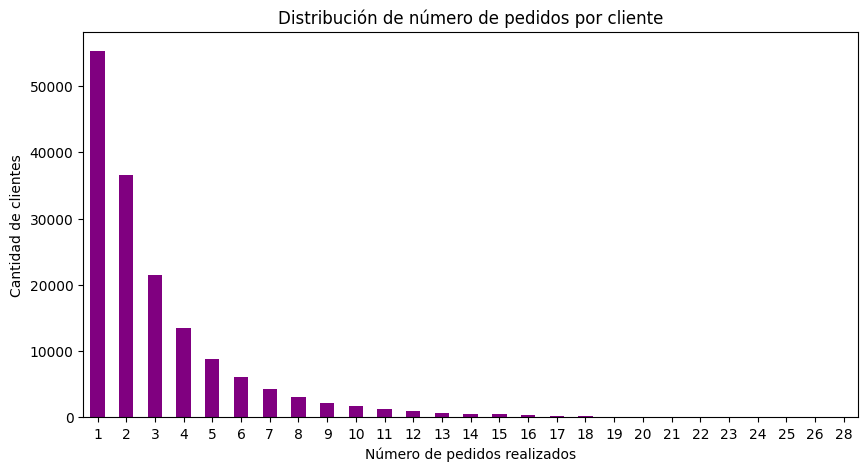

In [97]:
# Contar cuántos pedidos hizo cada cliente
pedidos_por_cliente = df_instacart_orders.groupby('user_id')['order_id'].nunique()

# Calcular la distribución: cuántos clientes hicieron 1, 2, 3... pedidos
distribucion_pedidos = pedidos_por_cliente.value_counts().sort_index()

# Mostrar la tabla de distribución
print("Distribución del número de pedidos por cliente:")
print(distribucion_pedidos)

# Graficar la distribución
plt.figure(figsize=(10,5))
distribucion_pedidos.plot(kind='bar', color='purple')
plt.xlabel('Número de pedidos realizados')
plt.ylabel('Cantidad de clientes')
plt.title('Distribución de número de pedidos por cliente')
plt.xticks(rotation=0)
plt.show()

Escribe aquí tus conclusiones
La distribución del número de pedidos por cliente muestra cuántos usuarios hicieron 1, 2, 3, etc. pedidos en la plataforma. La mayoría de los clientes realiza pocos pedidos, y a medida que aumenta el número de pedidos, disminuye la cantidad de clientes que alcanzan esos valores. Esto es típico en plataformas de consumo recurrente: muchos usuarios prueban el servicio una vez, mientras que un grupo más pequeño se convierte en clientes frecuentes y realiza múltiples compras. Esta información es útil para identificar oportunidades de retención y segmentar a la clientela según su nivel de actividad.

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

Top 20 productos más populares (ID y nombre):
    product_id              product_name  veces_pedido
0        24852                    Banana         66050
1        13176    Bag of Organic Bananas         53297
2        21137      Organic Strawberries         37039
3        21903      Organic Baby Spinach         33971
4        47209      Organic Hass Avocado         29773
5        47766           Organic Avocado         24689
6        47626               Large Lemon         21495
7        16797              Strawberries         20018
8        26209                     Limes         19690
9        27845        Organic Whole Milk         19600
10       27966       Organic Raspberries         19197
11       22935      Organic Yellow Onion         15898
12       24964            Organic Garlic         15292
13       45007          Organic Zucchini         14584
14       39275       Organic Blueberries         13879
15       49683            Cucumber Kirby         13675
16       28204     

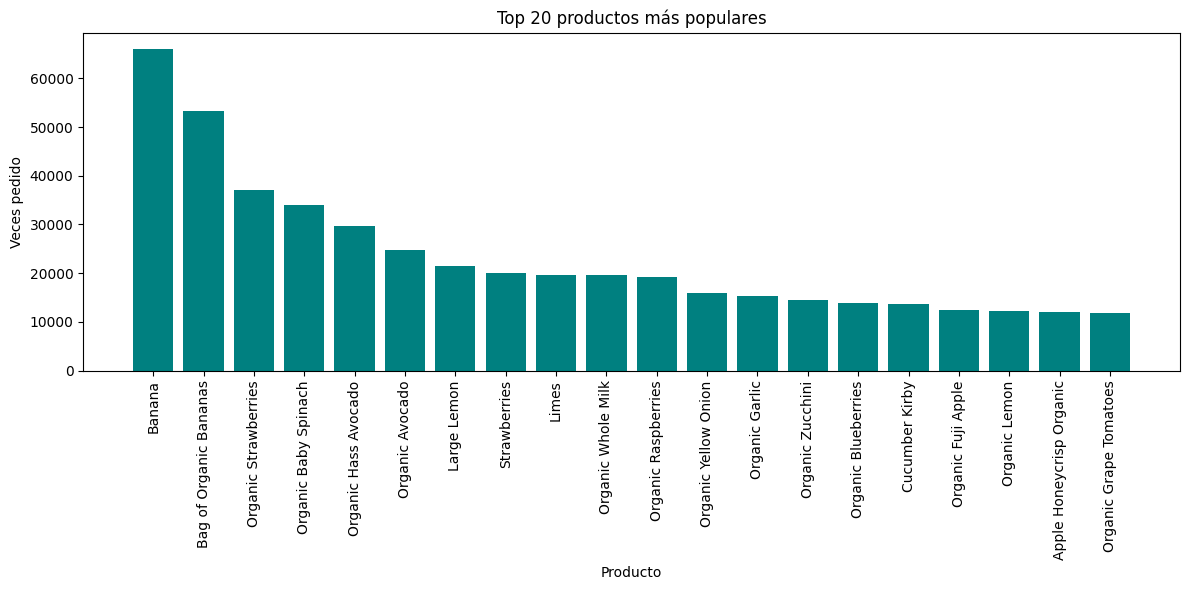

In [98]:
# Contar la cantidad de veces que se pidió cada producto
top_productos = df_order_products['product_id'].value_counts().head(20)

# Unir con el DataFrame de productos para obtener los nombres
top_productos_df = pd.DataFrame({'product_id': top_productos.index, 'veces_pedido': top_productos.values})
top_productos_df = top_productos_df.merge(df_products[['product_id', 'product_name']], on='product_id', how='left')

# Mostrar los resultados
print("Top 20 productos más populares (ID y nombre):")
print(top_productos_df[['product_id', 'product_name', 'veces_pedido']])

# Opcional: gráfico de barras
plt.figure(figsize=(12,6))
plt.bar(top_productos_df['product_name'], top_productos_df['veces_pedido'], color='teal')
plt.xlabel('Producto')
plt.ylabel('Veces pedido')
plt.title('Top 20 productos más populares')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Escribe aquí tus conclusiones
Los 20 productos más populares representan aquellos artículos que los clientes piden con mayor frecuencia en la plataforma. Identificar estos productos permite a la empresa enfocar estrategias de inventario, promociones y marketing en los artículos de mayor demanda. Además, estos productos suelen ser básicos o de consumo recurrente, lo que puede indicar tendencias de compra y preferencias generales de los usuarios.

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

Estadísticas descriptivas del número de artículos por pedido:
count    450046.000000
mean         10.098983
std           7.540206
min           1.000000
25%           5.000000
50%           8.000000
75%          14.000000
max         127.000000
Name: product_id, dtype: float64
    Artículos por pedido  Cantidad de pedidos
0                      1                21847
1                      2                26292
2                      3                29046
3                      4                31054
4                      5                31923
..                   ...                  ...
85                    98                    1
86                   104                    1
87                   108                    1
88                   115                    1
89                   127                    1

[90 rows x 2 columns]


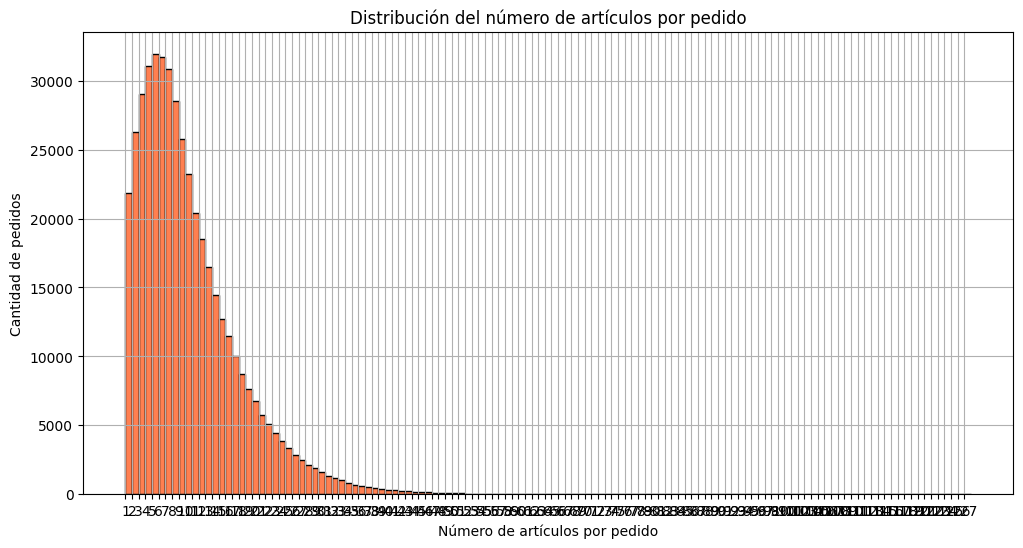

In [ ]:
# Contar cuántos productos hay en cada pedido
articulos_por_pedido = df_order_products.groupby('order_id')['product_id'].count()

# Mostrar estadísticas descriptivas
print("Estadísticas descriptivas del número de artículos por pedido:")
print(articulos_por_pedido.describe())

# Tabla de frecuencias
tabla_frecuencia = articulos_por_pedido.value_counts().sort_index().reset_index()
tabla_frecuencia.columns = ['Artículos por pedido', 'Cantidad de pedidos']
print(tabla_frecuencia)

# Graficar la distribución
plt.figure(figsize=(12,6))
articulos_por_pedido.hist(bins=range(1, articulos_por_pedido.max()+2), color='coral', edgecolor='black')
plt.xlabel('Número de artículos por pedido')
plt.ylabel('Cantidad de pedidos')
plt.title('Distribución del número de artículos por pedido')
plt.xticks(range(1, articulos_por_pedido.max()+1))
plt.show()

Escribe aquí tus conclusiones

Las personas suelen comprar una cantidad variable de artículos por pedido, pero la mayoría de los pedidos contiene entre 5 y 10 productos. La distribución es asimétrica a la derecha: hay muchos pedidos pequeños y menos pedidos grandes. El promedio y la mediana de artículos por pedido reflejan que la mayoría de los clientes hace compras de tamaño moderado, aunque existen algunos pedidos con una cantidad considerablemente mayor de productos. Esto sugiere que la plataforma es utilizada tanto para compras pequeñas y rápidas como para compras más grandes y planificadas.

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

Top 20 artículos más reordenados (ID y nombre):
    product_id              product_name  veces_reordenado
0        24852                    Banana             55763
1        13176    Bag of Organic Bananas             44450
2        21137      Organic Strawberries             28639
3        21903      Organic Baby Spinach             26233
4        47209      Organic Hass Avocado             23629
5        47766           Organic Avocado             18743
6        27845        Organic Whole Milk             16251
7        47626               Large Lemon             15044
8        27966       Organic Raspberries             14748
9        16797              Strawberries             13945
10       26209                     Limes             13327
11       22935      Organic Yellow Onion             11145
12       24964            Organic Garlic             10411
13       45007          Organic Zucchini             10076
14       49683            Cucumber Kirby              9538
15      

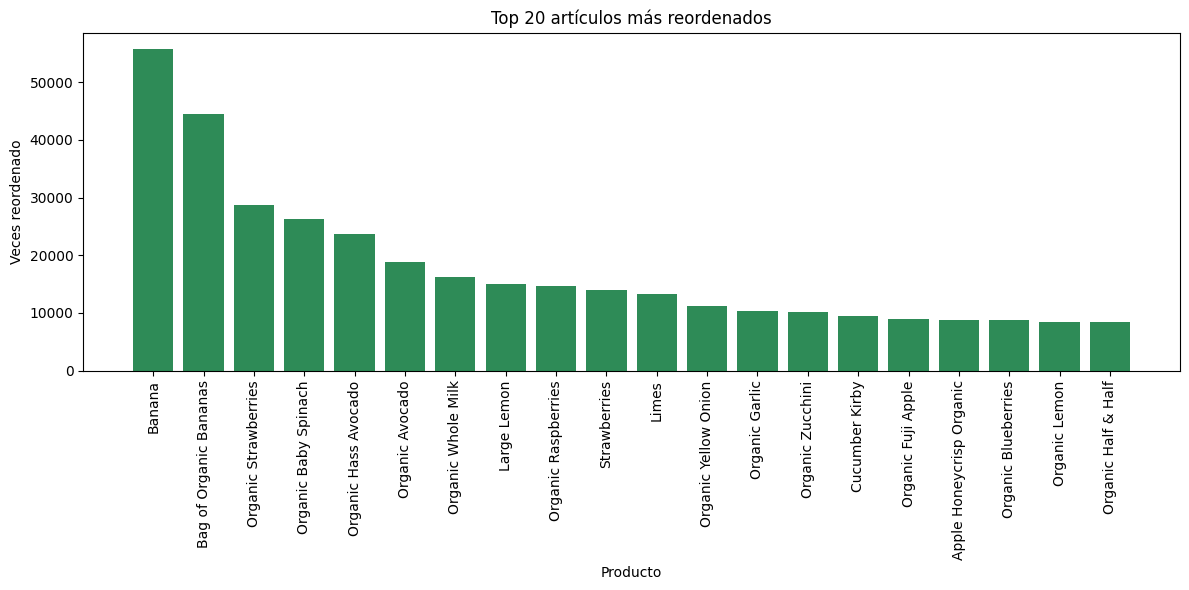

In [102]:
# Filtrar solo los productos que fueron reordenados (reordered == 1)
recompras = df_order_products[df_order_products['reordered'] == 1]

# Contar cuántas veces cada producto fue reordenado
top_recomprados = recompras['product_id'].value_counts().head(20)

# Unir con el DataFrame de productos para obtener los nombres
top_recomprados_df = pd.DataFrame({'product_id': top_recomprados.index, 'veces_reordenado': top_recomprados.values})
top_recomprados_df = top_recomprados_df.merge(df_products[['product_id', 'product_name']], on='product_id', how='left')

# Mostrar los resultados
print("Top 20 artículos más reordenados (ID y nombre):")
print(top_recomprados_df[['product_id', 'product_name', 'veces_reordenado']])

# Gráfico de barras
plt.figure(figsize=(12,6))
plt.bar(top_recomprados_df['product_name'], top_recomprados_df['veces_reordenado'], color='seagreen')
plt.xlabel('Producto')
plt.ylabel('Veces reordenado')
plt.title('Top 20 artículos más reordenados')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Escribe aquí tus conclusiones

Los 20 artículos más reordenados corresponden a productos que los clientes tienden a comprar de manera recurrente, lo que indica su importancia en la vida cotidiana y su alta demanda. Estos productos suelen ser básicos o de consumo frecuente, como alimentos esenciales o productos de uso diario. Identificar estos artículos permite a la empresa priorizar su disponibilidad y diseñar estrategias de fidelización enfocadas en los hábitos de recompra de los usuarios.

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [103]:
# Calcular el total de veces que se pidió cada producto
total_pedidos = df_order_products.groupby('product_id')['order_id'].count()

# Calcular el total de veces que se reordenó cada producto (reordered == 1)
total_reordenados = df_order_products[df_order_products['reordered'] == 1].groupby('product_id')['order_id'].count()

# Calcular la tasa de repetición para cada producto
tasa_repeticion = (total_reordenados / total_pedidos).fillna(0)

# Unir con los nombres de los productos
tasa_repeticion_df = tasa_repeticion.reset_index()
tasa_repeticion_df.columns = ['product_id', 'tasa_repeticion']
tasa_repeticion_df = tasa_repeticion_df.merge(df_products[['product_id', 'product_name']], on='product_id', how='left')

# Mostrar los 10 productos con mayor tasa de repetición (opcional)
top_tasa = tasa_repeticion_df.sort_values(by='tasa_repeticion', ascending=False).head(10)
print("Top 10 productos con mayor tasa de repetición:")
print(top_tasa[['product_id', 'product_name', 'tasa_repeticion']])

# Mostrar los 10 productos con menor tasa de repetición (opcional)
bottom_tasa = tasa_repeticion_df.sort_values(by='tasa_repeticion', ascending=True).head(10)
print("\nTop 10 productos con menor tasa de repetición:")
print(bottom_tasa[['product_id', 'product_name', 'tasa_repeticion']])

Top 10 productos con mayor tasa de repetición:
       product_id                     product_name  tasa_repeticion
28108       30644             Organic French Roast              1.0
7340         8054       Bissli Smokey Wheat Snacks              1.0
28114       30650  Mushroom Lover's Veggie Burgers              1.0
41002       44747      Frozen Organic Blackberries              1.0
40998       44743                   Real Zero Cola              1.0
32921       35897                         Ham Hock              1.0
32861       35834         Bulgarian Organic Yogurt              1.0
2684         2939       Cheddar Crunchin' Crackers              1.0
20357       22209     Temples Earl Gray Strong Tea              1.0
20361       22213    2% Reduced Fat Chocolate Milk              1.0

Top 10 productos con menor tasa de repetición:
       product_id                                       product_name  \
45543       49663  Ultra Protein Power Crunch Peanut Butter N' Ho...   
45550       4

Escribe aquí tus conclusiones

La tasa de repetición de pedido para cada producto muestra qué tan probable es que un artículo vuelva a ser comprado por los clientes. Los productos con una tasa de repetición alta suelen ser de consumo frecuente o esenciales, mientras que los de tasa baja pueden ser compras ocasionales o productos menos populares. Este análisis ayuda a identificar los artículos clave para la retención de clientes y a entender mejor los hábitos de recompra en la plataforma.

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [104]:
# Para cada usuario, calcular la tasa de repetición: cuántos productos en sus pedidos ya los había pedido antes

# Unir order_products con orders para obtener el user_id en cada producto pedido
df_merged = df_order_products.merge(df_instacart_orders[['order_id', 'user_id']], on='order_id', how='left')

# Calcular, para cada usuario, la tasa de repetición: promedio de la columna 'reordered'
tasa_repeticion_usuario = df_merged.groupby('user_id')['reordered'].mean().reset_index()
tasa_repeticion_usuario.columns = ['user_id', 'tasa_repeticion_usuario']

# Mostrar estadísticas descriptivas y algunos ejemplos
print("Estadísticas descriptivas de la tasa de repetición por usuario:")
print(tasa_repeticion_usuario['tasa_repeticion_usuario'].describe())
print("\nEjemplo de tasas de repetición por usuario:")
print(tasa_repeticion_usuario.head())

Estadísticas descriptivas de la tasa de repetición por usuario:
count    149626.000000
mean          0.494853
std           0.292685
min           0.000000
25%           0.272727
50%           0.500000
75%           0.724138
max           1.000000
Name: tasa_repeticion_usuario, dtype: float64

Ejemplo de tasas de repetición por usuario:
   user_id  tasa_repeticion_usuario
0        2                 0.038462
1        4                 0.000000
2        5                 0.666667
3        6                 0.000000
4        7                 0.928571


Escribe aquí tus conclusiones

La tasa de repetición por usuario indica qué proporción de los productos que pide cada cliente ya los había pedido antes. Un valor alto sugiere que el usuario tiende a repetir sus compras, mientras que un valor bajo indica que suele probar productos nuevos. En general, la mayoría de los usuarios muestra una tasa de repetición significativa, lo que refleja hábitos de compra recurrentes y preferencia por ciertos productos. Esta métrica es útil para estrategias de retención y personalización de recomendaciones.

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

Top 20 artículos más frecuentes como primer producto en el carrito:
    product_id                 product_name  veces_primero
0        24852                       Banana          15562
1        13176       Bag of Organic Bananas          11026
2        27845           Organic Whole Milk           4363
3        21137         Organic Strawberries           3946
4        47209         Organic Hass Avocado           3390
5        21903         Organic Baby Spinach           3336
6        47766              Organic Avocado           3044
7        19660                 Spring Water           2336
8        16797                 Strawberries           2308
9        27966          Organic Raspberries           2024
10       44632   Sparkling Water Grapefruit           1914
11       49235          Organic Half & Half           1797
12       47626                  Large Lemon           1737
13         196                         Soda           1733
14       38689     Organic Reduced Fat Milk    

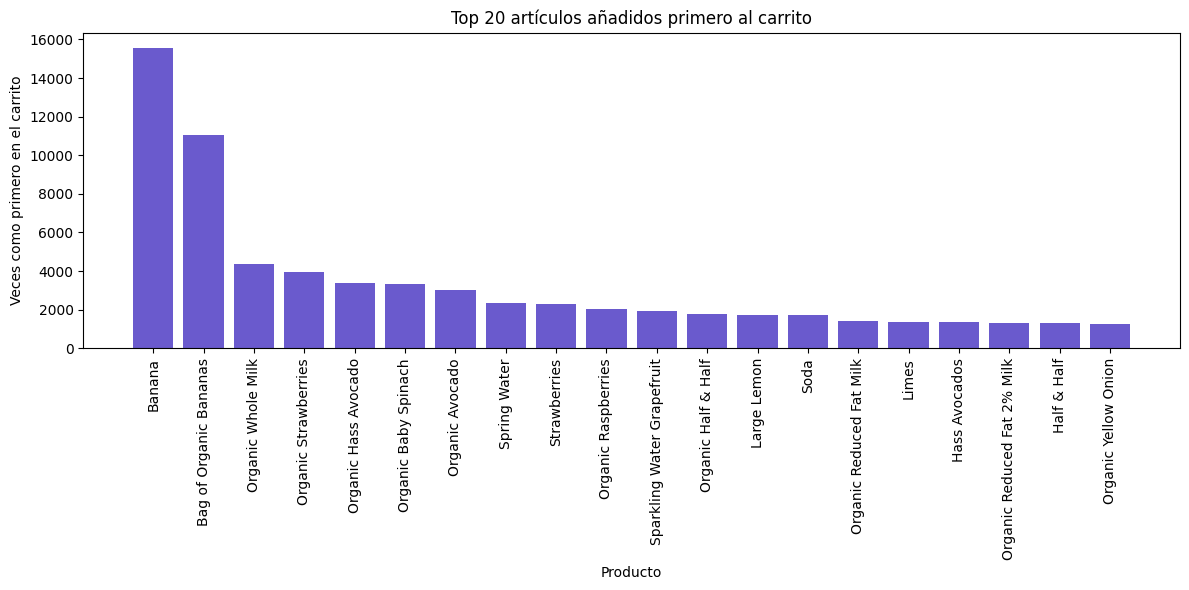

In [105]:
# Filtrar los productos que fueron añadidos en primer lugar en el carrito (add_to_cart_order == 1)
primeros_productos = df_order_products[df_order_products['add_to_cart_order'] == 1]

# Contar cuántas veces cada producto fue el primero en el carrito
top_primeros = primeros_productos['product_id'].value_counts().head(20)

# Unir con el DataFrame de productos para obtener los nombres
top_primeros_df = pd.DataFrame({'product_id': top_primeros.index, 'veces_primero': top_primeros.values})
top_primeros_df = top_primeros_df.merge(df_products[['product_id', 'product_name']], on='product_id', how='left')

# Mostrar los resultados
print("Top 20 artículos más frecuentes como primer producto en el carrito:")
print(top_primeros_df[['product_id', 'product_name', 'veces_primero']])

# Gráfico de barras
plt.figure(figsize=(12,6))
plt.bar(top_primeros_df['product_name'], top_primeros_df['veces_primero'], color='slateblue')
plt.xlabel('Producto')
plt.ylabel('Veces como primero en el carrito')
plt.title('Top 20 artículos añadidos primero al carrito')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Escribe aquí tus conclusiones

Los 20 artículos que más frecuentemente se añaden primero al carrito suelen ser productos esenciales o favoritos de los clientes, reflejando hábitos de compra prioritarios. Estos productos pueden considerarse de alta importancia para la experiencia de usuario y la fidelización, ya que suelen ser los primeros en la mente del consumidor al iniciar su compra. Identificarlos ayuda a entender preferencias y a optimizar estrategias de marketing y surtido.

### Conclusión general del proyecto

A lo largo de este proyecto, se realizó un análisis exhaustivo de los datos de pedidos y productos de la plataforma Instacart, abordando desde la limpieza y preprocesamiento de los datos hasta el análisis exploratorio y la extracción de insights clave sobre el comportamiento de compra de los usuarios.

En la primera etapa, se identificaron y corrigieron problemas de calidad en los datos, como valores ausentes y duplicados, asegurando que la información utilizada para el análisis fuera confiable y representativa de la realidad del negocio. Este paso fue fundamental para evitar sesgos y errores en las conclusiones posteriores.

Durante el análisis exploratorio, se observaron patrones claros en los hábitos de compra: la mayoría de los pedidos se concentran en horarios diurnos, especialmente entre las 9 y las 16 horas, y los días con mayor actividad son el domingo y el lunes. Además, se evidenció que la frecuencia de recompra es alta, tanto a nivel de productos como de usuarios, lo que indica que los clientes tienden a repetir sus elecciones y a mantener rutinas de consumo relativamente estables.

El estudio de los productos más populares y los más reordenados permitió identificar aquellos artículos que son esenciales para los clientes y que, por tanto, deben ser prioritarios en la gestión de inventario y en las estrategias de marketing. Asimismo, el análisis de los productos que suelen añadirse primero al carrito reveló cuáles son los artículos que los usuarios consideran más importantes o urgentes en sus compras.

Por último, el análisis de la tasa de repetición por usuario mostró que la mayoría de los clientes tiende a repetir una parte significativa de sus compras, lo que abre oportunidades para la personalización de recomendaciones y la fidelización a través de promociones dirigidas.

En resumen, este proyecto no solo permitió comprender mejor los patrones de compra en Instacart, sino que también sentó las bases para la toma de decisiones informadas en áreas como inventario, marketing y experiencia del cliente. El enfoque metódico y detallado en cada etapa del análisis garantiza que los hallazgos sean sólidos y aplicables en la práctica.